In [1]:
!pip install swifter
import swifter
import nltk
import re
import pandas as pd
import numpy as np
nltk.download(['punkt','wordnet','stopwords'])
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk import ngrams
from collections import Counter
import matplotlib.pyplot as plt

en_stopword = stopwords.words('english')
en_stopword.remove('not')

ps = PorterStemmer()
lm = WordNetLemmatizer()

df = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')
df.head()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.9 MB/s eta 0:00:0000:010:01
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16505 sha256=73ed73ef54722dcb7512bafdade070e414b1c5d904871bebf0ef590fe0fec7e1
  Stored in directory: /root/.cache/pip/wheels/ef/7f/bd/9bed48f078f3ee1fa75e0b29b6e0335ce1cb03a38d3443b3a3
Successfully built swifter


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [2]:
df.drop('sentiment',axis=1)

,review
0,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...
2,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is..."
...,...
49995,I thought this movie did a down right good job...
49996,"Bad plot, bad dialogue, bad acting, idiotic di..."
49997,I am a Catholic taught in parochial elementary...
49998,I'm going to have to disagree with the previou...


In [3]:
df['lower_case_review'] = df['review'].str.lower()
df.head()

,review,sentiment,lower_case_review
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production. <br /><br />the...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"petter mattei's ""love in the time of money"" is..."


In [4]:
df['remove_br'] = df['lower_case_review'].apply(lambda x : re.sub(r'[<br/>]','',x))
df.head()

,review,sentiment,lower_case_review,remove_br
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,one of the othe eviewes has mentioned that aft...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production. <br /><br />the...,a wondeful little poduction. the filming tec...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,i thought this was a wondeful way to spend tim...
3,Basically there's a family where a little boy ...,negative,basically there's a family where a little boy ...,asically thee's a family whee a little oy (jak...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"petter mattei's ""love in the time of money"" is...","pette mattei's ""love in the time of money"" is ..."


In [5]:
df['remove_stopwords'] = df['remove_br'].apply(lambda x : ' '.join([word for word in x.split() if word not in en_stopword]))
df.head()

,review,sentiment,lower_case_review,remove_br,remove_stopwords
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,one of the othe eviewes has mentioned that aft...,one othe eviewes mentioned afte watching 1 oz ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production. <br /><br />the...,a wondeful little poduction. the filming tec...,wondeful little poduction. filming technique v...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,i thought this was a wondeful way to spend tim...,thought wondeful way spend time hot summe week...
3,Basically there's a family where a little boy ...,negative,basically there's a family where a little boy ...,asically thee's a family whee a little oy (jak...,asically thee's family whee little oy (jake) t...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"petter mattei's ""love in the time of money"" is...","pette mattei's ""love in the time of money"" is ...","pette mattei's ""love time money"" visually stun..."


In [6]:
df['remove_punc'] = df['remove_stopwords'].apply(lambda x : re.sub(r'[^\w\s]','',x))
df.head()

,review,sentiment,lower_case_review,remove_br,remove_stopwords,remove_punc
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,one of the othe eviewes has mentioned that aft...,one othe eviewes mentioned afte watching 1 oz ...,one othe eviewes mentioned afte watching 1 oz ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production. <br /><br />the...,a wondeful little poduction. the filming tec...,wondeful little poduction. filming technique v...,wondeful little poduction filming technique ve...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,i thought this was a wondeful way to spend tim...,thought wondeful way spend time hot summe week...,thought wondeful way spend time hot summe week...
3,Basically there's a family where a little boy ...,negative,basically there's a family where a little boy ...,asically thee's a family whee a little oy (jak...,asically thee's family whee little oy (jake) t...,asically thees family whee little oy jake thin...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"petter mattei's ""love in the time of money"" is...","pette mattei's ""love in the time of money"" is ...","pette mattei's ""love time money"" visually stun...",pette matteis love time money visually stunnin...


In [7]:
df['tokenize'] = df['remove_punc'].apply(lambda x : word_tokenize(x))
df.head()

,review,sentiment,lower_case_review,remove_br,remove_stopwords,remove_punc,tokenize
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,one of the othe eviewes has mentioned that aft...,one othe eviewes mentioned afte watching 1 oz ...,one othe eviewes mentioned afte watching 1 oz ...,"[one, othe, eviewes, mentioned, afte, watching..."
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production. <br /><br />the...,a wondeful little poduction. the filming tec...,wondeful little poduction. filming technique v...,wondeful little poduction filming technique ve...,"[wondeful, little, poduction, filming, techniq..."
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,i thought this was a wondeful way to spend tim...,thought wondeful way spend time hot summe week...,thought wondeful way spend time hot summe week...,"[thought, wondeful, way, spend, time, hot, sum..."
3,Basically there's a family where a little boy ...,negative,basically there's a family where a little boy ...,asically thee's a family whee a little oy (jak...,asically thee's family whee little oy (jake) t...,asically thees family whee little oy jake thin...,"[asically, thees, family, whee, little, oy, ja..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"petter mattei's ""love in the time of money"" is...","pette mattei's ""love in the time of money"" is ...","pette mattei's ""love time money"" visually stun...",pette matteis love time money visually stunnin...,"[pette, matteis, love, time, money, visually, ..."


In [8]:
def lemmatize_and_stem(tokens):
    return [lm.lemmatize(word) for word in tokens], [ps.stem(word) for word in tokens]

df[['lemmatized', 'stemmed']] = df['tokenize'].swifter.apply(
    lambda x: pd.Series(lemmatize_and_stem(x))
)

df.head()

Pandas Apply:   0%|          | 0/50000 [00:00<?, ?it/s]

,review,sentiment,lower_case_review,remove_br,remove_stopwords,remove_punc,tokenize,lemmatized,stemmed
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,one of the othe eviewes has mentioned that aft...,one othe eviewes mentioned afte watching 1 oz ...,one othe eviewes mentioned afte watching 1 oz ...,"[one, othe, eviewes, mentioned, afte, watching...","[one, othe, eviewes, mentioned, afte, watching...","[one, oth, eview, mention, aft, watch, 1, oz, ..."
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production. <br /><br />the...,a wondeful little poduction. the filming tec...,wondeful little poduction. filming technique v...,wondeful little poduction filming technique ve...,"[wondeful, little, poduction, filming, techniq...","[wondeful, little, poduction, filming, techniq...","[wond, littl, poduct, film, techniqu, vey, una..."
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,i thought this was a wondeful way to spend tim...,thought wondeful way spend time hot summe week...,thought wondeful way spend time hot summe week...,"[thought, wondeful, way, spend, time, hot, sum...","[thought, wondeful, way, spend, time, hot, sum...","[thought, wond, way, spend, time, hot, summ, w..."
3,Basically there's a family where a little boy ...,negative,basically there's a family where a little boy ...,asically thee's a family whee a little oy (jak...,asically thee's family whee little oy (jake) t...,asically thees family whee little oy jake thin...,"[asically, thees, family, whee, little, oy, ja...","[asically, thees, family, whee, little, oy, ja...","[asic, thee, famili, whee, littl, oy, jake, th..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"petter mattei's ""love in the time of money"" is...","pette mattei's ""love in the time of money"" is ...","pette mattei's ""love time money"" visually stun...",pette matteis love time money visually stunnin...,"[pette, matteis, love, time, money, visually, ...","[pette, matteis, love, time, money, visually, ...","[pett, mattei, love, time, money, visual, stun..."


In [9]:
from itertools import chain
ngram_list = list(chain.from_iterable(df['lemmatized']))

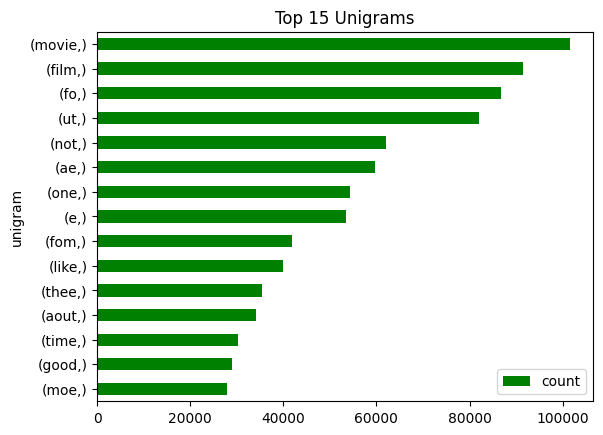

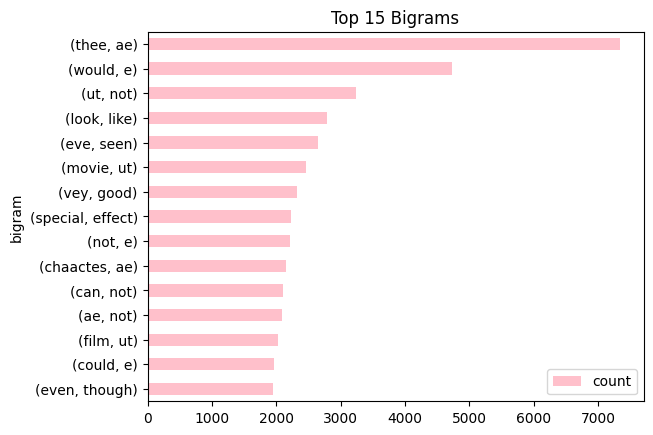

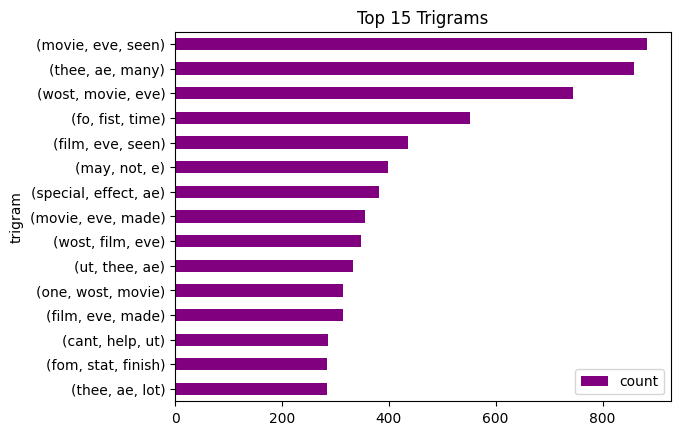

In [16]:
#Counting
unigram = Counter(ngrams(ngram_list,1))
bigram = Counter(ngrams(ngram_list,2))
trigram = Counter(ngrams(ngram_list,3))

#Converting to dataframe
unigram_df = pd.DataFrame(unigram.most_common(15), columns = ['unigram', 'count'])
bigram_df = pd.DataFrame(bigram.most_common(15), columns = ['bigram', 'count'])
trigram_df = pd.DataFrame(trigram.most_common(15), columns = ['trigram', 'count'])

#Sorting
unigram_df = unigram_df.sort_values(by = 'count')
bigram_df = bigram_df.sort_values(by = 'count')
trigram_df = trigram_df.sort_values(by = 'count')

#Plotting
unigram_df.plot.barh(y='count',x='unigram',color='green',legend='false',title='Top 15 Unigrams')
bigram_df.plot.barh(y='count',x='bigram',color='pink',legend='false',title='Top 15 Bigrams')
trigram_df.plot.barh(y='count',x='trigram',color='purple',legend='false',title='Top 15 Trigrams')
plt.show()